# Nedbank: Assessment for Senior Data Scientist

The Task: Is to build a model to predict the target variable “Loan”, given the dataset in the csv file. 


## 1.Data Pre-processing and Exploratort EDA

I am going to explore my data and understand what is happening. This will help me to make the assummptions that I need to make and pick information that was left out as stated. 

In [3]:
# Import the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [4]:
## Load the dataset
data = pd.read_csv('bank.csv')

In [5]:
#View of the data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
#List the columns
data.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

All the columns names are lower cased, just like I like it for uniformity. 

In [8]:
#Checking in poutcome, I cnt see to guess what this feature gives or means
data.poutcome.unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

Could it mean previous outcome of a loan application or payout come or maybe previous loan campaign outcome. I am going to assume previous campaign outcome status. The 'unkown' could me maybe the person was involved in any campaign before. So I can treat it as a NaN or just leave it as a reason to, feeding into the imputs. 
Then what would 'other' mean? ... I think it may mean that there was a special case or undefined reasons that really cnt be classifed into a pass or fail. 

In [15]:
#Checking in campaign
data.campaign.unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31], dtype=int64)

In [17]:
#Checking in campaign
data.previous.unique()

array([ 0,  1,  4,  2,  3, 10,  7,  9,  5, 29,  6, 13, 17,  8, 11, 30, 22,
       58, 21, 14, 26, 12, 19, 55, 23, 15, 20, 27, 16, 41, 40, 28, 18, 37],
      dtype=int64)

In [19]:
#Dimension 
data.shape

(11162, 17)

In [21]:
#data type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [23]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [25]:
# Check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [27]:
# Inspect class balance of the target variable 'Loan'
data['loan'].value_counts()

loan
no     9702
yes    1460
Name: count, dtype: int64

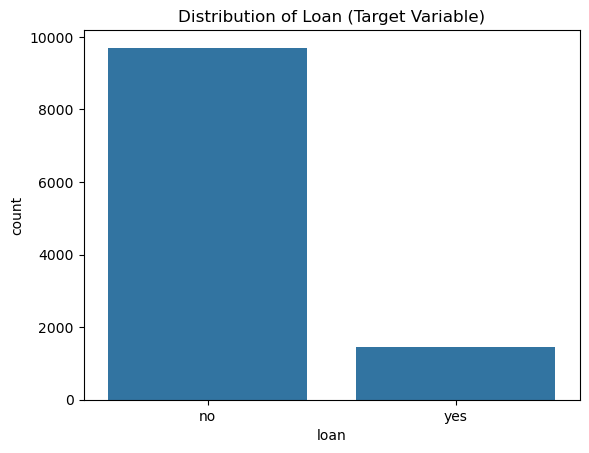

In [29]:
# Plot the distribution of target variable
sns.countplot(x='loan', data=data)
plt.title('Distribution of Loan (Target Variable)')
plt.show()

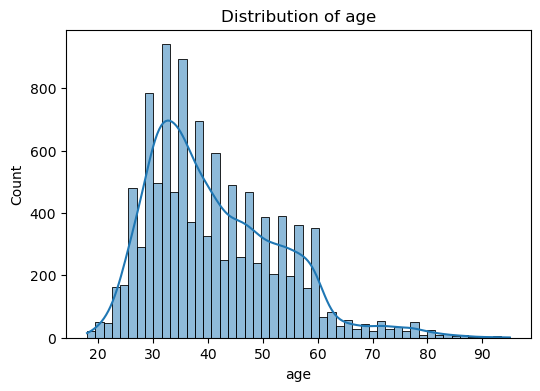

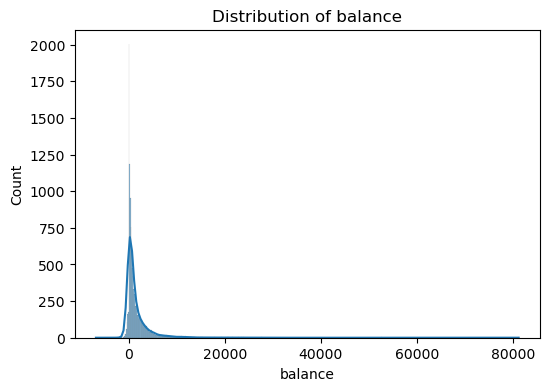

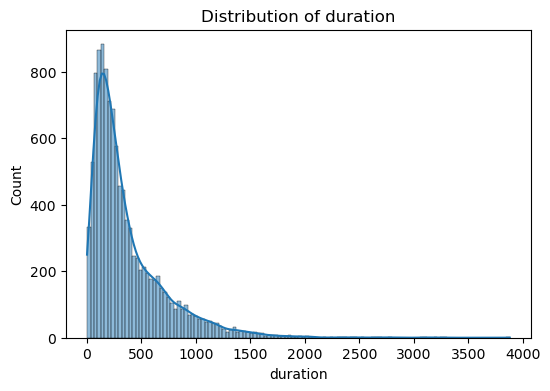

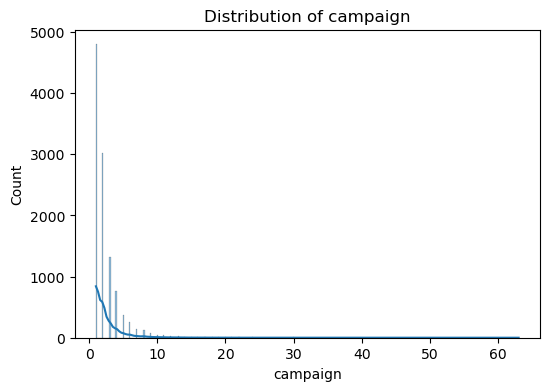

In [31]:
# Plotting distribution of numerical features
num_features = ['age', 'balance', 'duration', 'campaign']
for feature in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

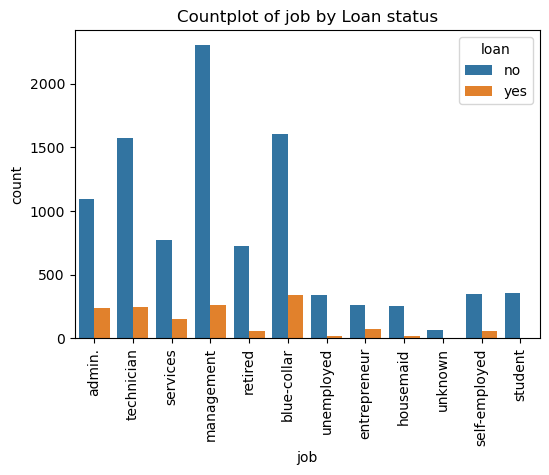

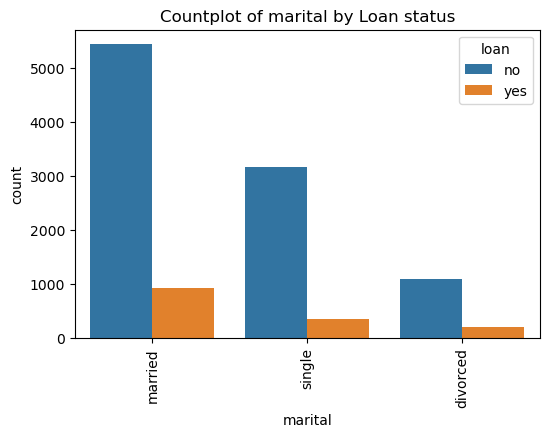

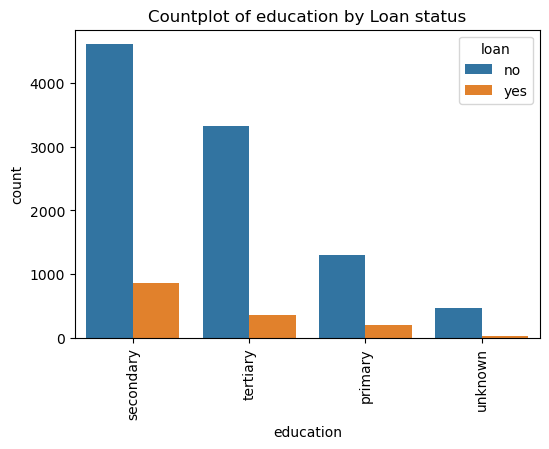

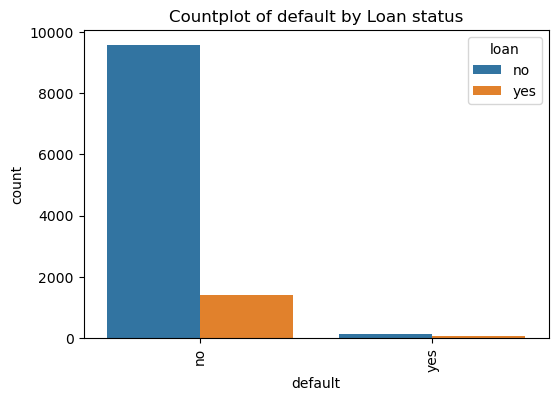

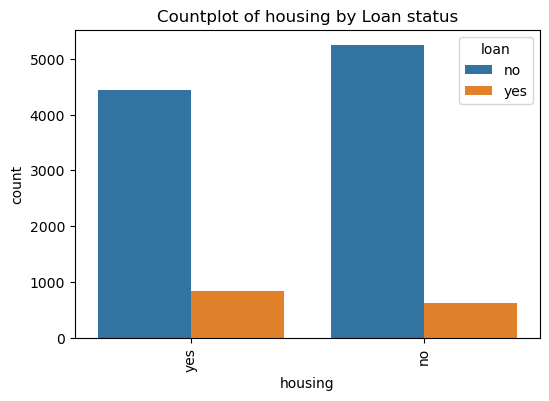

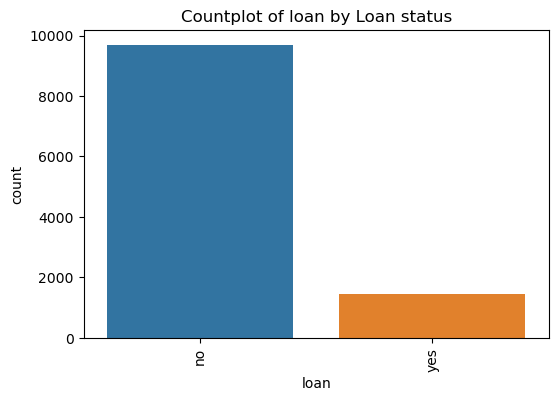

In [32]:
# Plot categorical features against the target variable
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for feature in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, hue='loan', data=data)
    plt.xticks(rotation=90)
    plt.title(f'Countplot of {feature} by Loan status')
    plt.show()

The target variable ‘loan’ is imbalanced, with a significantly higher number of False (no loan) than True (loan). This imbalance could affect the performance of the model, particularly in the recall and precision for the minority class (True for loan). I can either treat it or choose model that can handle this.

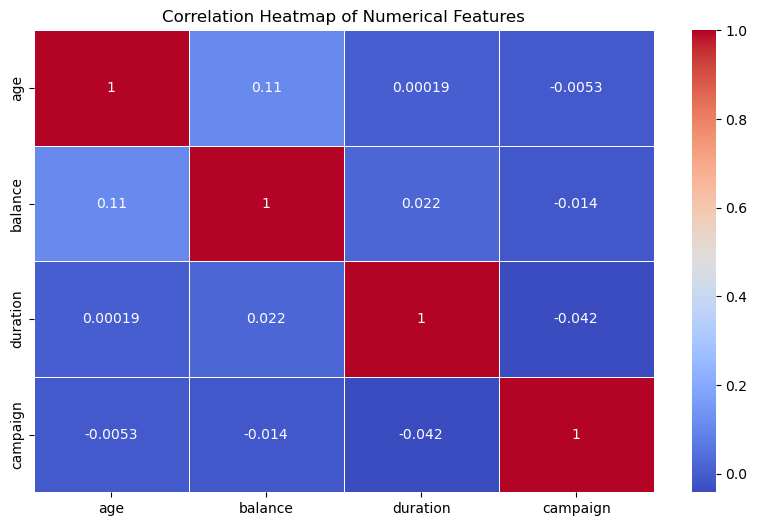

In [36]:
# Plot correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(data[num_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

No strong correlation observed amongst the features. 

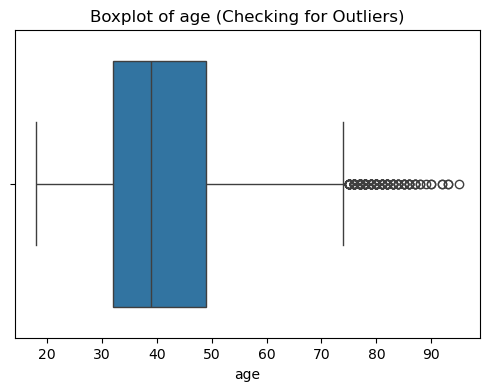

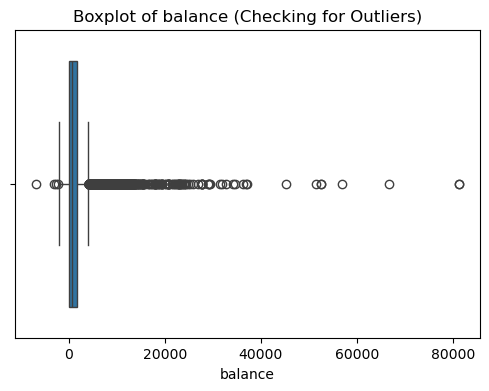

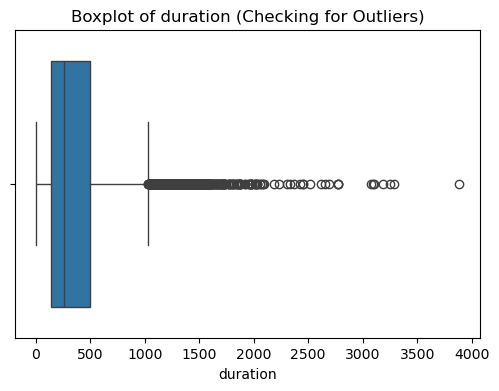

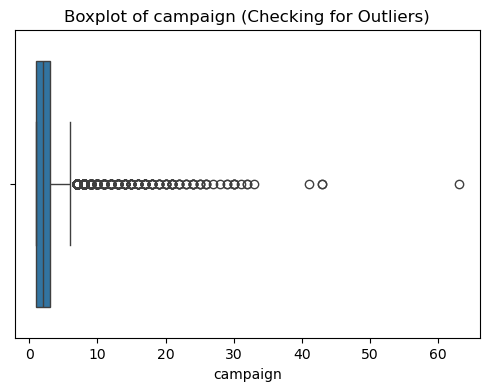

In [39]:
# Check for outliers
# List of numerical features to check for outliers
num_features = ['age', 'balance', 'duration', 'campaign']

# Plot boxplots to detect outliers in numerical features
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature} (Checking for Outliers)')
    plt.show()

There are various methods I can use to handle outliers such as the IqR or removing them or transformation. However I am choosing not to handling outliers now but will select a model that can handle them robustly.

## 2.Feature Engineering

In [43]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

In [45]:
# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_encoded[num_features] = scaler.fit_transform(data_encoded[num_features])

In [47]:
# Check the encoded and scaled data
data_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,1.491505,0.252525,5,1.930226,-0.554168,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
1,1.239676,-0.459974,5,3.154612,-0.554168,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
2,-0.019470,-0.080160,5,2.929901,-0.554168,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
3,1.155733,0.293762,5,0.596366,-0.554168,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
4,1.071790,-0.416876,5,0.867171,-0.186785,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True


In [49]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  float64
 1   balance              11162 non-null  float64
 2   day                  11162 non-null  int64  
 3   duration             11162 non-null  float64
 4   campaign             11162 non-null  float64
 5   pdays                11162 non-null  int64  
 6   previous             11162 non-null  int64  
 7   job_blue-collar      11162 non-null  bool   
 8   job_entrepreneur     11162 non-null  bool   
 9   job_housemaid        11162 non-null  bool   
 10  job_management       11162 non-null  bool   
 11  job_retired          11162 non-null  bool   
 12  job_self-employed    11162 non-null  bool   
 13  job_services         11162 non-null  bool   
 14  job_student          11162 non-null  bool   
 15  job_technician       11162 non-null 

## 3. Modelling

I am going to try the tree based model: randomforest first and then use AutoML tools to find the best model for this classification problem with my dataset.

#### 3.1 Base Model:RF

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [56]:
# Define the features (X) and target (y)
X = data_encoded.drop('loan_yes', axis=1)
y = data_encoded['loan_yes']

In [58]:
# Split the data into training and testing sets (I am going with the 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (8929, 42)
Testing set shape: (2233, 42)


In [62]:
# Initialize the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [64]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

In [68]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

Confusion Matrix:
 [[1942   18]
 [ 255   18]]
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.99      0.93      1960
        True       0.50      0.07      0.12       273

    accuracy                           0.88      2233
   macro avg       0.69      0.53      0.53      2233
weighted avg       0.84      0.88      0.83      2233

ROC AUC Score: 0.7070634297675114


### 3.2 AutoML to select best model with best parameters

I am deciding to use Tpot (Tree-based Pipeline Optimization Tool) over the other automl tools because it is simple and fast, plus I facour tree base pipelines personally. 

In [73]:
#!pip install tpot

In [75]:
from tpot import TPOTClassifier

In [76]:
#!pip install torch

In [79]:
# Initialize TPOT classifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

In [81]:
# Train the TPOT model (AutoML)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.868853799078422

Generation 2 - Current best internal CV score: 0.868853799078422

Generation 3 - Current best internal CV score: 0.868853799078422

Generation 4 - Current best internal CV score: 0.8691898707971429

Generation 5 - Current best internal CV score: 0.8693019156150703

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=4, min_samples_split=11, n_estimators=100)


TPOTClassifier(generations=5, population_size=50, random_state=42, verbosity=2)

In [82]:
# Make predictions
y_pred = tpot.predict(X_test)

In [83]:
# Evaluate the TPOT model
print(f"Accuracy: {tpot.score(X_test, y_test)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.8755038065382893
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.99      0.93      1960
        True       0.41      0.04      0.07       273

    accuracy                           0.88      2233
   macro avg       0.64      0.52      0.50      2233
weighted avg       0.82      0.88      0.83      2233

Confusion Matrix:
 [[1944   16]
 [ 262   11]]
ROC AUC Score: 0.7070634297675114


In [84]:
# Evaluate the best model found by TPOT
print(f'Best model pipeline: {tpot.fitted_pipeline_}')
tpot.score(X_test, y_test)

Best model pipeline: Pipeline(steps=[('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=True, criterion='entropy',
                                      max_features=0.35000000000000003,
                                      min_samples_leaf=4, min_samples_split=11,
                                      random_state=42))])


0.8755038065382893

In [85]:
# Export the best pipeline
tpot.export('best_pipeline.py')

### 3.3 ExtraTree Classifier: Dealing with imbalance data:Class_weight

Now that I know the best model, I need to adjust the class_weight parameter to handle the imbalance dataset, and see how it will improve the performance

In [92]:
#Import the extratee lib
from sklearn.ensemble import ExtraTreesClassifier

In [94]:
model_et = ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_features=0.35,
                             min_samples_leaf=4, min_samples_split=11, random_state=42)

model_et.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', criterion='entropy',
                     max_features=0.35, min_samples_leaf=4,
                     min_samples_split=11, random_state=42)

In [96]:
# Evaluate the TPOT model
print(f"Accuracy: {model_et.score(X_test, y_test)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.7492163009404389
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.99      0.93      1960
        True       0.41      0.04      0.07       273

    accuracy                           0.88      2233
   macro avg       0.64      0.52      0.50      2233
weighted avg       0.82      0.88      0.83      2233

Confusion Matrix:
 [[1944   16]
 [ 262   11]]
ROC AUC Score: 0.7070634297675114


Not a signicant improvement, let me try SMOTE

### 3.4 SMOTE 

In [98]:
#Call the SMOTE lib
from imblearn.over_sampling import SMOTE

In [100]:
#Resample features
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [102]:
# model_et1: extratreeversion one withought class_weight
model_et1 = ExtraTreesClassifier(criterion='entropy', max_features=0.35,
                              min_samples_leaf=4, min_samples_split=11, random_state=42)

In [104]:
#Train the smote model
model_et1.fit(X_resampled, y_resampled)

ExtraTreesClassifier(criterion='entropy', max_features=0.35, min_samples_leaf=4,
                     min_samples_split=11, random_state=42)

In [106]:
# Make predictions on the test set
y_pred = model_et1.predict(X_test)

In [108]:
print(f"Accuracy: {model_et1.score(X_test, y_test)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.7980295566502463
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.88      0.88      1960
        True       0.21      0.23      0.22       273

    accuracy                           0.80      2233
   macro avg       0.55      0.56      0.55      2233
weighted avg       0.81      0.80      0.80      2233

Confusion Matrix:
 [[1718  242]
 [ 209   64]]
ROC AUC Score: 0.7070634297675114


## 4. REST API 

In [175]:
app = Flask(__name__)
# Load the trained ExtraTrees model
model = joblib.load('best_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Accept input JSON
    data = request.get_json(force=True)
    customer_data = pd.DataFrame([data])
    
    # Ensure preprocessing matches training setup
    prediction = model.predict(customer_data)
    
    return jsonify({'loan_prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(port=5000, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Webster Oreilly\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
